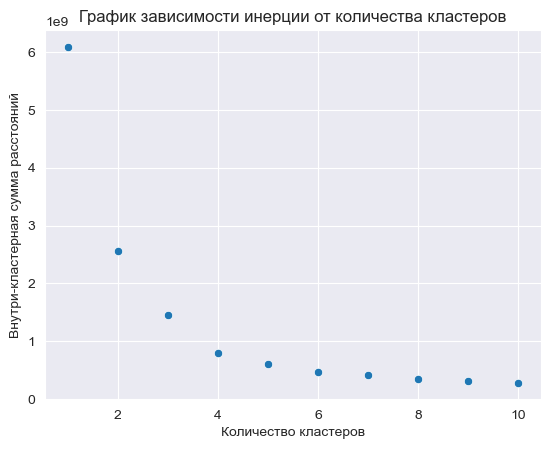

   screen_size  rear_camera_mp  front_camera_mp  internal_memory       ram      battery      weight  release_year   days_used  normalized_used_price  normalized_new_price  Amount
0    13.441332       11.570941         6.335480        40.192713  3.878857  2929.468231  166.684998   2015.957464  722.508026               4.444635              5.319367    1249
1    17.634226        9.656196         8.433473        58.108787  4.288703  5153.202929  261.151464   2017.527197  530.401674               4.708914              5.456340     240
2    15.746844       10.479460        12.790532        87.049505  4.828589  4007.518564  201.914418   2017.959158  476.471535               4.764316              5.590141     807
3    10.557131        6.284647         1.879727        45.290087  3.554288  1839.235183  139.300664   2014.096896  803.666980               3.833026              4.757518    1060
4    25.070816        8.187245         4.038776        61.714286  4.112245  7631.204082  509.151020   201

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Загрузка данных
PATH = "used_device_data.csv"
dataset = pd.read_csv(PATH)

# Определяем только числовые столбцы
NUMERIC_COLUMNS = ["screen_size", "rear_camera_mp", "front_camera_mp",
                   "internal_memory", "ram", "battery", "weight",
                   "release_year", "days_used", "normalized_used_price", "normalized_new_price"]

# Замена отсутствующих значений
dataset.fillna({
    "screen_size": dataset["screen_size"].mean(),  # Применение среднего для замены
    "rear_camera_mp": dataset["rear_camera_mp"].mean(),
    "front_camera_mp": dataset["front_camera_mp"].mean(),
    "internal_memory": dataset["internal_memory"].mean(),
    "ram": dataset["ram"].mean(),
    "battery": dataset["battery"].mean(),
    "weight": dataset["weight"].mean(),
    "release_year": dataset["release_year"].mean(),
    "days_used": dataset["days_used"].mean(),
    "normalized_used_price": dataset["normalized_used_price"].mean(),
    "normalized_new_price": dataset["normalized_new_price"].mean()
}, inplace=True)

# Приведение числовых столбцов к числовому типу
for column in NUMERIC_COLUMNS:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce').fillna(0)

# Приведение индексов
dataset.index = [index for index in range(len(dataset))]

# Построение графика зависимости инерции от количества кластеров
inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(dataset[NUMERIC_COLUMNS])  # Кластеризация только по числовым данным
    inertia.append(k_means.inertia_)

# Визуализация зависимости инерции от количества кластеров
sns.set_style('darkgrid')
sns.scatterplot(x=[x for x in range(1, 11)], y=inertia)
plt.title('График зависимости инерции от количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')
plt.show()

# Оптимальное количество кластеров (например, 5)
CLUSTERS = 5
model = KMeans(n_clusters=CLUSTERS, random_state=42)
model.fit(dataset[NUMERIC_COLUMNS])  # Кластеризация только по числовым данным

# Создание таблицы с центроидами кластеров
clusters = pd.DataFrame(columns=NUMERIC_COLUMNS, data=model.cluster_centers_)

# Добавление количества элементов в каждом кластере
clusters["Amount"] = np.unique(model.labels_, return_counts=True)[1]

# Установка опций для вывода всех столбцов в одной строке
pd.set_option('display.max_columns', None)  # Все столбцы выводятся
pd.set_option('display.expand_frame_repr', False)  # Отключаем переносы строк
pd.set_option('display.max_colwidth', None)  # Длинные строки не обрезаются
pd.set_option('display.width', 0)  # Отключаем ограничение на ширину вывода

# Вывод таблицы кластеров
print(clusters)